### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import import_ipynb
import matplotlib.pyplot as plt

In [ ]:
from kmeans import kmeans
from kmeanspp import compute_distance

## K-Means Testing

### Calculate Inertia

In [3]:
# Input
# centers: array containing all centroids
# clustered_data: all data points along with it's cluster
# Output
# Inertia
def calculate_inertia(centers, clustered_data):
    inertia = 0
    num_rows = clustered_data.shape[0]
    for i in range(num_rows):
        cluster_index = int(clustered_data[i][-1])
        center = centers[cluster_index]
        point = clustered_data[i][:-1]
        inertia += compute_distance(point, center)
    return inertia


### Calculate Dunn Index

In [4]:
# Input
# centers: array containing all centroids
# clustered_data: all data points along with it's cluster
# Output
# Dunn Index
def calculate_dunn_index(centers):
    if len(centers) < 2:
        return 1
    dist = []
    num_centers = len(centers)
    for i in range(num_centers):
        for j in range(i+1, num_centers):
            dist.append(compute_distance(centers[i], centers[j]))
    min_dist = dist[0]
    max_dist = dist[0]
    for i in range(1, len(dist)):
        min_dist = min(min_dist, dist[i])
        max_dist = max(max_dist, dist[i])
    return min_dist / max_dist

### Plot Inertia and Dunn Index vs K

In [5]:
def plotGraphs(data, maxK = 10):
    inertias = []
    dunn_indices = []
    Ks = range(1, maxK + 1)
    for i in range(1, maxK + 1):
        clustered_data, centers = kmeans(i, data)
        inertia = calculate_inertia(centers, clustered_data)
        dunn_index = calculate_dunn_index(centers)
        inertias.append(inertia)
        dunn_indices.append(dunn_index)
        print(inertia)
        print(dunn_index)
    plt.plot(Ks, inertias)
    plt.xlabel("K")
    plt.ylabel("Inertia")
    plt.show()
    plt.plot(Ks, dunn_indices)
    plt.xlabel("K")
    plt.ylabel("Dunn Index")
    plt.show()

In [10]:
df_products = pd.read_csv("df_phase9.csv",encoding="latin1")
df_products_inp = df_products.drop(["CustomerID",df_products.columns[0]],axis=1)
df_products_np = df_products_inp.to_numpy()

In [ ]:
df_products_inp = df_products.drop(["CustomerID",df_products.columns[0]],axis=1)
df_products_inp

In [8]:
df_products_np = df_products_inp.to_numpy()
print(df_products_np.shape)

(4339, 11)


311159371853.658
1
108887590179.261
1.0
53892290000.44654
0.07877530604132506
35516631722.12838
0.024749016540058406
30683703651.710354
0.022919064760177986
18947377205.465626
0.002821685282799405
18610555304.694874
0.002821685282799405
11094584439.501968
0.000386352054752986
10269481953.084421
0.000386352054752986
10069367153.86364
0.0003596028239927227


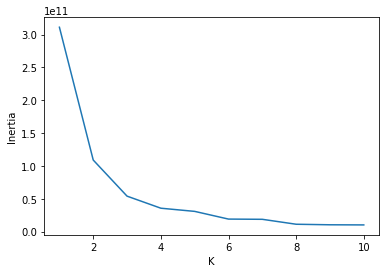

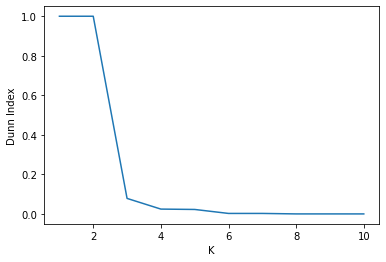

In [11]:
plotGraphs(df_products_np,10)

Optimal number of product categories = 5

In [ ]:
print(pd.Series(data[:,-1]).value_counts())